# Generate No Half-Circle Images

These images will serve as the label 0 images.

In [3]:
%load_ext autoreload
%autoreload 2

In [20]:
import sys
import random
import requests
import cv2
from PIL import Image
from tqdm.notebook import tqdm

sys.path.append('..')

from src.data.generate import IMG_SHAPE, generate_half_circle_image, \
    generate_filled_image, generate_noise_image, generate_picsum_image, \
    generate_from_random_crop_pdf

In [5]:
DATASET_SYNTHETIC_CONFIG = {
    'base_hc': 5000,
    'pdfcrop_hc': 5000,
    'noise': 250,
    'filled': 250,
    'picsum': 1250,
    'pdfcrop': 2500
}

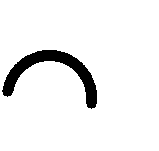

In [6]:
delta = 0.3
height, width = IMG_SHAPE
height = random.randint(int(height * (1 - delta)), int(height * (1 + delta)))
width = random.randint(int(width * (1 - delta)), int(width * (1 + delta)))
img = generate_half_circle_image(height=height, width=width)
Image.fromarray(img)

In [7]:
is_generate_images_enabled = False
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['halfcircle'])):
        # generate random half circle images of different dimensions
        # we want to randomize the dimension of the image too
        delta = 0.3
        height, width = IMG_SHAPE
        height = random.randint(int(height * (1 - delta)), int(height * (1 + delta)))
        width = random.randint(int(width * (1 - delta)), int(width * (1 + delta)))
        img = generate_half_circle_image(height=height, width=width)
        Image.fromarray(img).save(f'../data/hc/base/halfcircle_{i}.png')

In [8]:
is_generate_images_enabled = False
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['filled'])):
        fill_value = random.randint(0, 255)
        img = generate_filled_image(height=IMG_SHAPE[0], width=IMG_SHAPE[1], fill_value=fill_value)
        Image.fromarray(img).save(f'../data/other/pure_fill/pure_fill_{i}.png')

In [9]:
is_generate_images_enabled = False
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['noise'])):
        img = generate_noise_image(height=IMG_SHAPE[0], width=IMG_SHAPE[1])
        Image.fromarray(img).save(f'../data/other/pure_noise/pure_noise_{i}.png')

In [10]:
is_generate_images_enabled = False
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['picsum'])):
        height = random.randint(64, 256)
        width = random.randint(64, 256)
        generate_picsum_image(
            height=height, 
            width=width,
            save_filepath=f'../data/other/picsum/picsum_{i}.png'
        )

(247, 254)
True


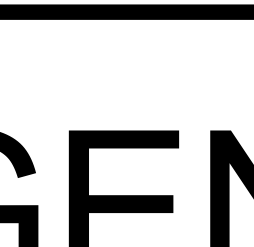

In [126]:
filepath = "/Users/alexandrepoupeau/Documents/work/code/perso/aitt/data/raw/el_origen/input/LOTE 12.pdf"
img = generate_from_random_crop_pdf(
    filepath_or_stream=filepath,
    page_nb=0,
    crop_width_pct=0.02,
    crop_height_pct=0.015
)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img.shape)
thresh = 128
pct_black_pixels = 0.1
n_black_pixels = int((img < thresh).sum())
print(n_black_pixels > img.shape[0] * img.shape[1] * pct_black_pixels)
Image.fromarray(img)

In [ ]:
is_generate_images_enabled = False
if is_generate_images_enabled:
    for i in tqdm(range(DATASET_SYNTHETIC_CONFIG['pdfcrop'])):
        img = gene(height=IMG_SHAPE[0], width=IMG_SHAPE[1])
        Image.fromarray(img).save(f'../data/other/pure_noise/pure_noise_{i}.png')